#Preparation

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Rectangle

### Upload .csv

CSV Fields
*   SID --> Student ID,  eg. A123
*   Group --> eg. Full/ Slice
*   Scenario --> eg. Vulnerability types: Path/ DOS/ SQL/ XSS
*   DemoMX --> Demographic Metrics, eg. Skills in Java, programming experience
*   IntervMX --> Metric of your choice, eg. Number of correctly identified vulnerability
*   PercM --> Perceived metric, eg. Perceived ML accuracy, if not applicable to the experiment set value NULL

In [ ]:
csv_file = files.upload()

Saving Data - Foglio1 (11).csv to Data - Foglio1 (11).csv


### Read data from .csv

In [ ]:
data = pd.read_csv('/content/Data.csv')

In [ ]:
MIN_DEMO1 = 1
MAX_DEMO1 = 4
MIN_DEMO2 = 1
MAX_DEMO2 = 4

In [ ]:
MIN_INTERV1 = -5
MAX_INTERV1 = 5
MIN_INTERV2 = -5
MAX_INTERV2 = 5

In [ ]:
MIN_PERC = 1
MAX_PERC = 3

In [ ]:
GROUP_COLORS = {"PN": "#FF2323", "PR": '#A5FF75', "AR": '#3A923A', "AN": '#FF9824' }

In [ ]:
SCENARIO_COLORS = {'M':"turquoise", 'C':"gold", 'N':"orchid", 'N':"green"}

# Demographic Analysis

## Histograms
Distributions of data (based on groups/ scenario)

In [ ]:
def produce_histogram(ax, data, group, groupVals, field, min, max, colors):
  if group == None:
    n, bins, patches = ax.hist(data[field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, width=0.75)
    ax.bar_label(patches, fontsize=10)
  else:
    n, bins, patches = ax.hist(data[data[group] == groupVals[0]][field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, color = colors[groupVals[0]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[1]][field], bins = np.arange(min, max+2, 1), rwidth=0.7, color = colors[groupVals[1]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[2]][field], bins = np.arange(min+0.25, max+2.25, 1), rwidth=0.7, color = colors[groupVals[2]], width=0.25)
    ax.bar_label(patches, fontsize=10)
  ax.set_xticks(np.arange(min+0.25, max+1.25, 1), np.arange(min, max+1, 1))
  ax.set_title(field)
  ax.set_xlim([min-0.5, max+1])
  return ax

### Demographic Histogram

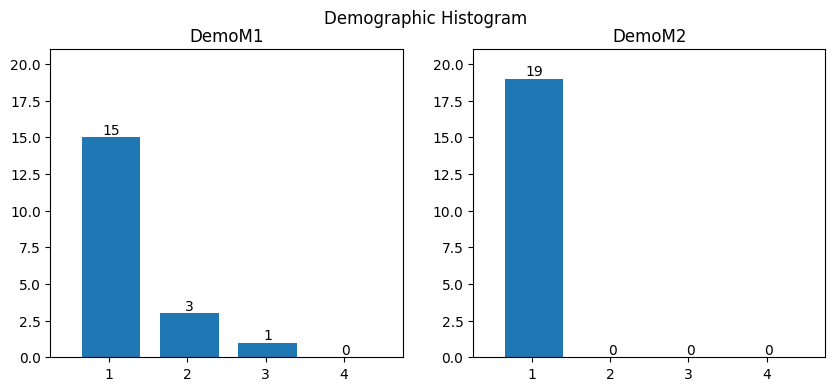

In [ ]:
max_ylim = max(data.groupby(["DemoM1"])["SID"].count().max(), data.groupby(["DemoM2"])["SID"].count().max()) + 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1 = produce_histogram(ax1, data, None, None, "DemoM1", MIN_DEMO1, MAX_DEMO1, GROUP_COLORS)
ax1.set_ylim([0,max_ylim])

ax2 = produce_histogram(ax2, data, None, None, "DemoM2", MIN_DEMO2, MAX_DEMO2, GROUP_COLORS)
ax2.set_ylim([0,max_ylim])

fig.suptitle("Demographic Histogram")
plt.show()

## Scatter plots
Represent values for two different numeric variables to compare the two variables.

In [ ]:
def scatter_plot(ax, data, group, groupVal, colors, first, second):
  if group == None:
    data_scatter = data
    color = "blue"
  else:
    data_scatter = data[data[group] == groupVal]
    color = colors[groupVal]

  a, ca = np.unique(np.c_[data_scatter[first],data_scatter[second]], return_counts=True, axis=0)
  ax.scatter(a[:,0],a[:,1],s=ca*50, c=color)

  if "Demo" in first:
    min1 = MIN_DEMO1
    max1 = MAX_DEMO1
  else:
    min1 = MIN_INTERV1
    max1 = MAX_INTERV1

  if "Demo" in second:
    min2 = MIN_DEMO2
    max2 = MAX_DEMO2
  else:
    min2 = MIN_INTERV2
    max2 = MAX_INTERV2

  ax.set_xticks(np.arange(min1, max1+1,1),np.arange(min1, max1+1,1))
  ax.set_yticks(np.arange(min2, max2+1,1),np.arange(min2, max2+1,1))
  if group is not None:
    ax.set_title(group + " " + groupVal)
  return ax

### Demographic Scatter Plot

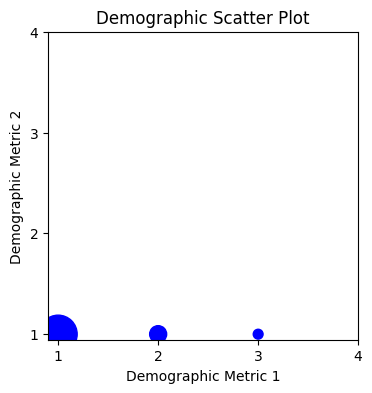

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = scatter_plot(ax, data, None, None, GROUP_COLORS,"DemoM1", "DemoM2")

ax.set_xlabel("Demographic Metric 1")
ax.set_ylabel("Demographic Metric 2")

plt.title("Demographic Scatter Plot")
plt.show()

# Intervention Metrics

## Boxplots
A standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

### Intervention Boxplot by Group

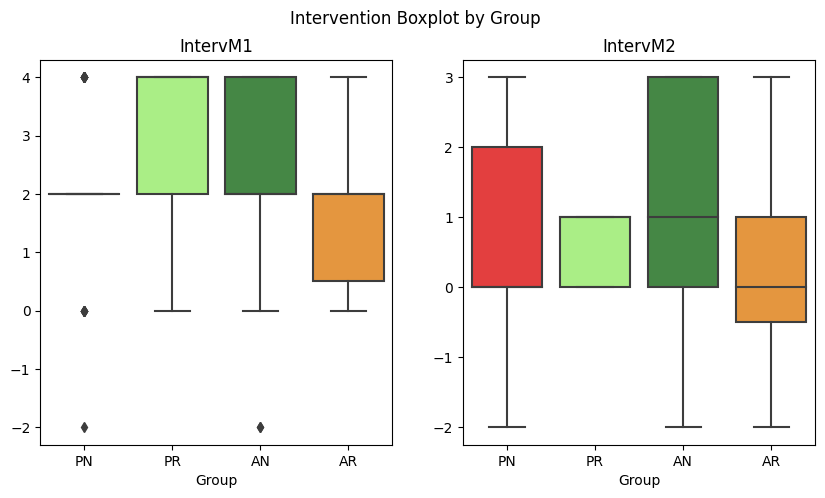

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='Group', y='IntervM1', data=data, ax=axes[0])
axes[0].set_title("IntervM1")
axes[0].set_ylabel("")

sns.boxplot(x='Group', y='IntervM2', data=data, ax=axes[1])
axes[1].set_title("IntervM2")
axes[1].set_ylabel("")

fig.suptitle("Intervention Boxplot by Group")
plt.show()

### Intervention Boxplot by Scenario

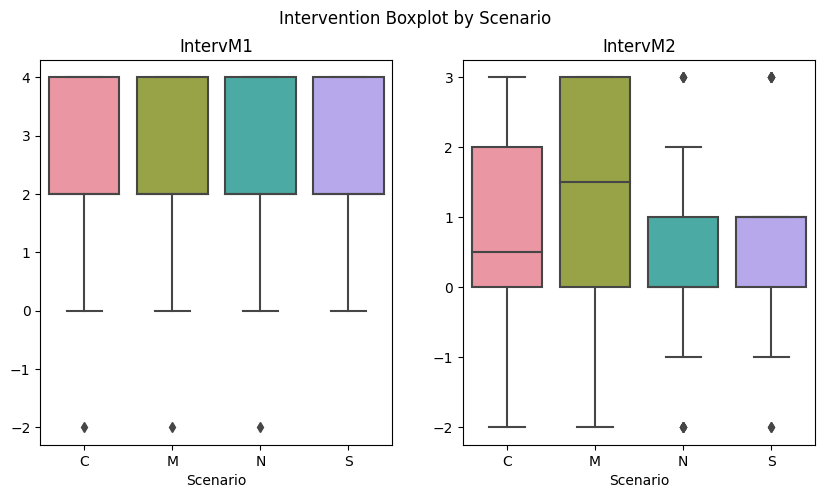

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='IntervM1', data=data, ax=axes[0])
axes[0].set_title("IntervM1")
axes[0].set_ylabel("")

sns.boxplot(x='Scenario', y='IntervM2', data=data, ax=axes[1])
axes[1].set_title("IntervM2")
axes[1].set_ylabel("")

fig.suptitle("Intervention Boxplot by Scenario")
plt.show()

# Perception Metric

## Histograms

### Perception Histogram

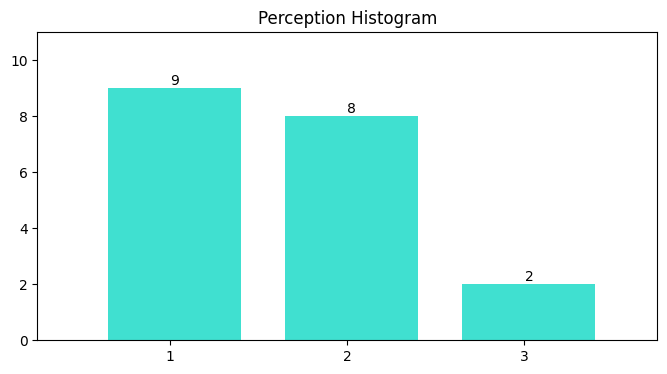

In [ ]:
max_ylim = data.groupby(["PercM"])["SID"].count().max()+2

fig, ax = plt.subplots(figsize=(8, 4))

ax = produce_histogram(ax, data, None, None, "PercM", MIN_PERC, MAX_PERC, GROUP_COLORS)
ax.set_ylim([0,max_ylim])

plt.title("Perception Histogram")
plt.show()

# Statistical Test

# Analyze zero vs non-zero with Chi-square and Wilcoxon

In case your metrics determine an excess of zeros we need to split the analysis in two test:


1.   A test to determine an effect by a binary distinction: zero - non zero
2.   A test to determine an effect on the non-zero part of data. Ignoring in the analysis the zeros



In [ ]:
#define threshold for zero/non-zero or keep zero as the threshold
threshold_intervm1 = 0 #here your choice, it can also be zero
threshold_intervm2 = 0 #here your choice, it can also be zero

#all below threshold and equal is zero, else is non-zero
data_zero_non_zero = data.copy()
data_zero_non_zero.loc[data_zero_non_zero['IntervM1']<=threshold_intervm1,'IntervM1']=0
data_zero_non_zero.loc[data_zero_non_zero['IntervM1']>threshold_intervm1,'IntervM1']=1

data_zero_non_zero.loc[data_zero_non_zero['IntervM2']<=threshold_intervm2,'IntervM2']=0
data_zero_non_zero.loc[data_zero_non_zero['IntervM2']>threshold_intervm2,'IntervM2']=1

#chi-square test zero-non zero
contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.IntervM1)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.IntervM2)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

IntervM1  0.0  1.0
Group             
AN          7   46
AR          4   10
PN          8   42
PR         12   42
Group x IntervM1 Chi_square value 2.6557368179164547 p value 0.447801839966523 degrees of freedom 3
IntervM2  0.0  1.0
Group             
AN         33   50
AR         22    9
PN         32   18
PR          3    4
Group x IntervM2 Chi_square value 12.557498861806673 p value 0.005698154128426386 degrees of freedom 3


In [ ]:
#define threshold for zero/non-zero or keep zero as the threshold
threshold_intervm1 = 0 #here your choice, it can also be zero
threshold_intervm2 = 0 #here your choice, it can also be zero

#all below threshold and equal is zero, else is non-zero
data_zero_non_zero = data.copy()
data_zero_non_zero.loc[data_zero_non_zero['IntervM1']<=threshold_intervm1,'IntervM1']=0
data_zero_non_zero.loc[data_zero_non_zero['IntervM1']>threshold_intervm1,'IntervM1']=1

data_zero_non_zero.loc[data_zero_non_zero['IntervM2']<=threshold_intervm2,'IntervM2']=0
data_zero_non_zero.loc[data_zero_non_zero['IntervM2']>threshold_intervm2,'IntervM2']=1

#chi-square test zero-non zero
contingency_table = pd.crosstab(data_zero_non_zero.Scenario, data_zero_non_zero.IntervM1)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data_zero_non_zero.Scenario, data_zero_non_zero.IntervM2)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

IntervM1  0.0  1.0
Scenario          
C           4   36
M           7   31
N          12   40
S           8   33
Scenario x IntervM1 Chi_square value 2.693655467270731 p value 0.4413065582115592 degrees of freedom 3
IntervM2  0.0  1.0
Scenario          
C          20   20
M          15   23
N          38   17
S          17   21
Scenario x IntervM2 Chi_square value 9.676565656565659 p value 0.02152531932271718 degrees of freedom 3


## If data is ordinal, perform Wilcoxon Ranksum Tests

In case we do not have an excess of zeros we can directly apply Wilcoxon if ordinal

In [ ]:
#ignore NaN values
data_nonnan_intervm1 = data[data['IntervM1']>-10]
data_nonnan_intervm2 = data[data['IntervM2']>-10]

from itertools import combinations

my_groups = data_nonnan_intervm1["Group"].unique()


stat, p = stats.ranksums(x=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[0]]['IntervM1'], y=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[1]]['IntervM1'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[1],stat, p))

stat, p = stats.ranksums(x=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[0]]['IntervM1'], y=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[2]]['IntervM1'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[2],stat, p))

stat, p = stats.ranksums(x=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[0]]['IntervM1'], y=data_nonnan_intervm1[data_nonnan_intervm1.Group == my_groups[3]]['IntervM1'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[3],stat, p))

#same for intervM2
my_groups = data_nonnan_intervm2["Group"].unique()

stat, p = stats.ranksums(x=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[0]]['IntervM2'], y=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[1]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[1],stat, p))

stat, p = stats.ranksums(x=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[0]]['IntervM2'], y=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[2]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[2],stat, p))

stat, p = stats.ranksums(x=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[0]]['IntervM2'], y=data_nonnan_intervm2[data_nonnan_intervm2.Group == my_groups[3]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[3],stat, p))

IntervM1 Group PN x Group PR stat = -1.9518001458970662, p-value = 0.050961936967763306
IntervM1 Group PN x Group AN stat = -2.0092700622051107, p-value = 0.04450850104215877
IntervM1 Group PN x Group AR stat = 0.8931977372352652, p-value = 0.3717512896455607
IntervM2 Group PN x Group AN stat = -2.0044488372521916, p-value = 0.04502200229459211
IntervM2 Group PN x Group AR stat = 1.4477851447415748, p-value = 0.14767714860530295
IntervM2 Group PN x Group PR stat = -0.4376380851754782, p-value = 0.661648658429044


In [ ]:
#ignore NaN values
data_nonnan_intervm1 = data[data['IntervM1']>-10]
data_nonnan_intervm2 = data[data['IntervM2']>-10]

from itertools import combinations

scenario_pairs = list(combinations(data["Scenario"].unique(), 2))

for pair in scenario_pairs:
  stat, p = stats.ranksums(x=data_nonnan_intervm1[data_nonnan_intervm1.Scenario == pair[0]]['IntervM1'], y=data_nonnan_intervm1[data_nonnan_intervm1.Scenario == pair[1]]['IntervM1'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM1', pair[0], pair[1],stat, p))

  stat, p = stats.ranksums(x=data_nonnan_intervm2[data_nonnan_intervm2.Scenario == pair[0]]['IntervM2'], y=data_nonnan_intervm2[data_nonnan_intervm2.Scenario == pair[1]]['IntervM2'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM2', pair[0], pair[1],stat, p))

IntervM1 Scenario C x Scenario M stat = 0.5598134266148451, p-value = 0.5756067044802415
IntervM2 Scenario C x Scenario M stat = -1.5944685990190677, p-value = 0.1108311184266882
IntervM1 Scenario C x Scenario N stat = 1.4492232881643243, p-value = 0.14727523595370995
IntervM2 Scenario C x Scenario N stat = 1.9862059824060176, p-value = 0.04701045686538801
IntervM1 Scenario C x Scenario S stat = 0.11807876055510418, p-value = 0.906005252327854
IntervM2 Scenario C x Scenario S stat = 0.1549483591523232, p-value = 0.8768620289081899
IntervM1 Scenario M x Scenario N stat = 0.7801530816479691, p-value = 0.43530077515313115
IntervM2 Scenario M x Scenario N stat = 3.442702270150576, p-value = 0.0005759329903356875
IntervM1 Scenario M x Scenario S stat = -0.41701418969032805, p-value = 0.6766680287944251
IntervM2 Scenario M x Scenario S stat = 1.8024413538239987, p-value = 0.0714759938333621
IntervM1 Scenario N x Scenario S stat = -1.222616304128435, p-value = 0.22147465211451645
IntervM2 Sce

# [OPTIONAL] Additional analysis
This is free for students to add additional analysis and plots